In [3]:
import numpy as np
import os
import sys
sys.path.append("../utils")
from metric import calculate_metric
from json_tools import get_from_pool
from pool_iterator import pool_iterator

from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
with open("constants.csv") as handler:
    print(next(handler).strip().split(','))
    data = [list(map(float, line.strip().split(','))) for line in handler]

['pos', 'id', 'metric', 'id_cnt']


In [23]:
for pos in list(range(10)) + [100]:
    pos_metrics = np.array([item[2] for item in data if int(item[0]) == pos])
    pos_weights = np.array([item[3] for item in data if int(item[0]) == pos])
    print(np.sum(pos_metrics * pos_weights) / np.sum(pos_weights))

0.5996127357371698
0.615518731846263
0.6194423357244512
0.6196837834176225
0.6193030409380619
0.6208603485984598
0.6209507889597503
0.6202337260332857
0.617635595368642
0.6201133963344024
0.6142247510604602


In [4]:
def eval_consts(day):
    data_folder = "../../../data/best_features_days_data/"
    json_filename = os.path.join(data_folder, "day_{}.json".format(day))
    pool_positions = get_from_pool(pool_iterator(json_filename), "pos", int)
    pool_probs = get_from_pool(pool_iterator(json_filename), "p")
    pool_targets = get_from_pool(pool_iterator(json_filename), "target", int)
    for pos in list(range(10)) + [100]:
        print(
            pos,
            calculate_metric(
                [pos] * len(pool_positions),
                pool_positions,
                pool_targets,
                pool_probs
            )
        )

In [5]:
eval_consts(6)

0 0.5977653631284916
1 0.6059344091618948
2 0.5985611510791367
3 0.646669815777043
4 0.6277407054337464
5 0.6202346041055717
6 0.627939142461964
7 0.6079545454545455
8 0.6426274689940285
9 0.6344328965205602
100 0.6307139188495121


In [6]:
eval_consts(3)

0 0.5970394736842106
1 0.632788868723533
2 0.6121212121212121
3 0.6224328593996841
4 0.6317443687794656
5 0.6128177966101693
6 0.6232106339468301
7 0.5950827897641747
8 0.5959798994974875
9 0.6035353535353535
100 0.6092436974789918


In [23]:
pos_probs = sorted(list(set(zip(pool_positions, pool_probs))), key=lambda item: item[0])

In [24]:
probs = [item[1] for item in pos_probs]

In [25]:
pos_probs, probs

([(0, 0.05994005994),
  (1, 0.08391608392),
  (2, 0.08891108891),
  (3, 0.09290709291),
  (4, 0.09490509491),
  (5, 0.0959040959),
  (6, 0.0969030969),
  (7, 0.0979020979),
  (8, 0.0989010989),
  (9, 0.0989010989),
  (100, 0.09090909091)],
 [0.05994005994,
  0.08391608392,
  0.08891108891,
  0.09290709291,
  0.09490509491,
  0.0959040959,
  0.0969030969,
  0.0979020979,
  0.0989010989,
  0.0989010989,
  0.09090909091])

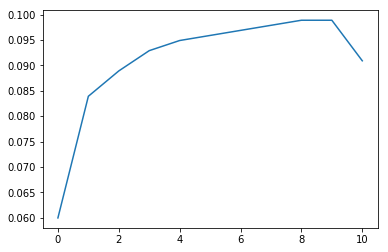

In [29]:
plt.plot(probs)

In [17]:
set(zip([1,2,3],[1,2,4]))

{(1, 1), (2, 2), (3, 4)}